In [1]:
# Ventana de tiempo prepandemia 
import pandas as pd  # Pandas proporciona estructuras de datos y herramientas para el análisis de datos.
import seaborn as sns  # Seaborn es una biblioteca de visualización de datos basada en matplotlib.
import matplotlib.pyplot as plt  # Matplotlib es una biblioteca de gráficos 2D que produce figuras de calidad de publicación.
from pathlib import Path  # Pathlib ofrece clases para manejar rutas de archivos de manera orientada a objetos.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import numpy as np
import os  # La biblioteca os permite interactuar con el sistema operativo.

In [2]:
s_path = Path.cwd()  # Obtiene el directorio de trabajo actual como un objeto Path.
s_prt_path = s_path.parent/'..'/'Datasets' # Accede al directorio padre del directorio actual. Utilizamos '..' para subir un nivel en la jerarquía de directorios.
ruta_carpeta_atras = s_prt_path.resolve() # Normalizamos la ruta para resolver cualquier ruta relativa
ruta_csv = os.path.join(s_prt_path,'Data_XM.csv')  # Crea una ruta al archivo CSV en el directorio padre.
df_DataModel= pd.read_csv(ruta_csv)  # Lee el archivo CSV en un DataFrame de pandas.

In [3]:
df_DataModel['Date'] = pd.to_datetime(df_DataModel['Date'])  # Convierte la columna 'Date' a tipo datetime.
df_DataModel.drop('Unnamed: 0', axis=1, inplace=True)  # Elimina la columna 'Unnamed: 0'.

In [4]:
df_DataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8886 non-null   datetime64[ns]
 1   Demanda    8886 non-null   float64       
 2   VolUtil    8886 non-null   float64       
 3   Aportes    8886 non-null   float64       
 4   PrecioB    8886 non-null   float64       
 5   PrecioO    8886 non-null   float64       
 6   DispTer    8886 non-null   float64       
 7   DispNoTer  8886 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 555.5 KB


In [5]:
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time = pd.to_datetime('2000-01-01')
end_time = pd.to_datetime('2019-03-01')

In [6]:
# Filtra el DataFrame
filtered_df = df_DataModel[df_DataModel['Date'].between(start_time, end_time)]

In [7]:
# Convertir la columna de fecha a múltiples columnas numéricas
filtered_df['year'] = filtered_df['Date'].dt.year
filtered_df['month'] = filtered_df['Date'].dt.month
filtered_df['day'] = filtered_df['Date'].dt.day
filtered_df = filtered_df.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_13476\256231009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_13476\256231009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_13476\256231009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [8]:
filtered_df.head(-1)

,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer,year,month,day
0,3.619477e+06,1.080803e+10,56677300.0,32.868123,98.359312,2.846091e+06,7.774834e+06,2000,1,1
1,3.660170e+06,1.078818e+10,54645200.0,33.034790,96.103387,2.754967e+06,7.766716e+06,2000,1,2
2,4.366035e+06,1.075306e+10,57488300.0,37.272290,96.537377,2.751592e+06,7.761926e+06,2000,1,3
3,4.491048e+06,1.071967e+10,58418200.0,41.688957,96.636300,2.751300e+06,7.744445e+06,2000,1,4
4,4.459620e+06,1.068971e+10,63039500.0,40.893123,94.805851,2.751300e+06,7.759892e+06,2000,1,5
...,...,...,...,...,...,...,...,...,...,...
6993,7.122057e+06,8.644510e+09,87179100.0,322.590895,370.304514,4.224538e+06,9.659271e+06,2019,2,24
6994,8.137477e+06,8.613842e+09,88485100.0,361.728695,371.224236,4.263101e+06,9.263221e+06,2019,2,25
6995,8.239534e+06,8.559566e+09,84367800.0,292.077995,358.720625,4.178875e+06,9.031502e+06,2019,2,26
6996,8.274899e+06,8.510944e+09,93936600.0,338.385517,362.446310,4.047174e+06,9.017892e+06,2019,2,27


In [9]:
# Preparar los datos
X = filtered_df.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'
y = filtered_df['PrecioB']  # la columna 'PrecioB'

In [10]:
print(X)

           Demanda       VolUtil     Aportes     PrecioO       DispTer  \
0     3.619477e+06  1.080803e+10  56677300.0   98.359312  2.846091e+06   
1     3.660170e+06  1.078818e+10  54645200.0   96.103387  2.754967e+06   
2     4.366035e+06  1.075306e+10  57488300.0   96.537377  2.751592e+06   
3     4.491048e+06  1.071967e+10  58418200.0   96.636300  2.751300e+06   
4     4.459620e+06  1.068971e+10  63039500.0   94.805851  2.751300e+06   
...            ...           ...         ...         ...           ...   
6994  8.137477e+06  8.613842e+09  88485100.0  371.224236  4.263101e+06   
6995  8.239534e+06  8.559566e+09  84367800.0  358.720625  4.178875e+06   
6996  8.274899e+06  8.510944e+09  93936600.0  362.446310  4.047174e+06   
6997  8.316201e+06  8.457132e+09  91820500.0  360.840755  4.060981e+06   
6998  8.334235e+06  8.391268e+09  80952600.0  370.978831  4.361869e+06   

         DispNoTer  year  month  day  
0     7.774834e+06  2000      1    1  
1     7.766716e+06  2000      1  

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),

                            },cv=5, scoring='neg_root_mean_squared_error',verbose=1,n_jobs=-1
                           )

In [13]:
# Entrenar el modelo
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='neg_root_mean_squared_error', verbose=1)

In [14]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Mejores hiperparámetros: {'max_features': 0.6000000000000002, 'n_estimators': 80}


In [15]:
# Obtener el mejor score
best_score = grid_search.best_score_
print(f'Mejor score: {best_score}')

Mejor score: -27.692236502859135


In [16]:
grid_search.cv_results_

{'mean_fit_time': array([0.12138138, 0.26545506, 0.34368978, 0.32634654, 0.44399371,
        0.58115449, 0.78381567, 0.95612898, 0.84930506, 1.14307408,
        0.90479984, 1.27729735, 1.29011536, 1.3660285 , 1.22595139,
        1.31150117, 1.48450413, 1.51318607, 1.89546671, 0.09897871,
        0.18430753, 0.25326891, 0.38138256, 0.43919215, 0.52985001,
        0.54808483, 0.72496357, 0.79967055, 0.79679689, 0.99563866,
        1.07862186, 1.14390159, 1.25416751, 1.32205701, 1.38457112,
        1.37056189, 1.535184  , 1.6211381 , 0.0821651 , 0.15951824,
        0.23015776, 0.32650318, 0.38563108, 0.5158329 , 0.55730586,
        0.67492361, 0.75039911, 0.80576329, 0.92081776, 1.0344388 ,
        1.06493702, 1.13868866, 1.28895888, 1.36578403, 1.4643024 ,
        1.44648285, 1.63146806, 0.11484675, 0.23287048, 0.37332325,
        0.45779805, 0.61117325, 0.67157989, 0.87608314, 0.91320038,
        1.05851288, 1.19176164, 1.27692542, 1.44054198, 1.547293  ,
        1.57907538, 1.84279051,

In [18]:
# Crear el modelo de Random Forest con los mejores hiperparámetros
best_model = RandomForestRegressor(n_estimators=80, max_features=0.6000000000000002, random_state=42)

In [19]:
# Entrenar el modelo
best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.6000000000000002, n_estimators=80,
                      random_state=42)

In [20]:
# Hacer predicciones con el conjunto de prueba
predictions = best_model.predict(X_test)

In [21]:
# Calcular el RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

RMSE: 25.411142075302052


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
# Calcular el MAE
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

MAE: 12.184248839002976


In [23]:
# Calcular el R^2
r2 = r2_score(y_test, predictions)
print(f'R^2: {r2}')

R^2: 0.965469632197445


In [24]:
# Calcular los residuos
residuos = y_test - predictions

In [25]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5)

In [26]:
# Calcular las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

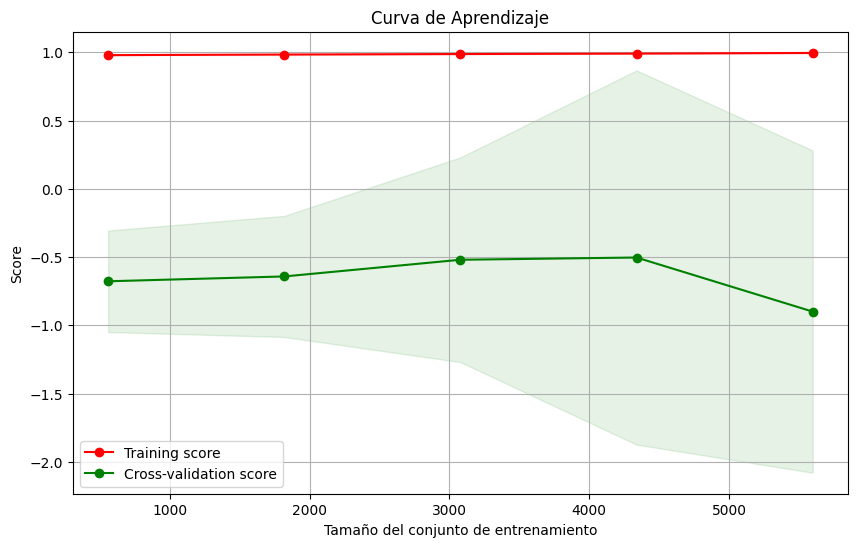

In [27]:
# Crear el gráfico
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Score')
plt.title('Curva de Aprendizaje')
plt.legend(loc="best")
plt.grid()
plt.show()

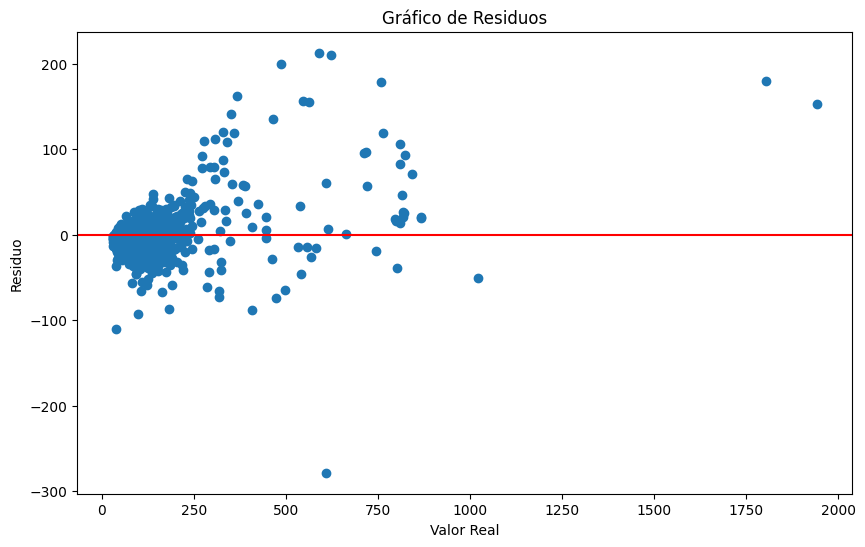

In [28]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

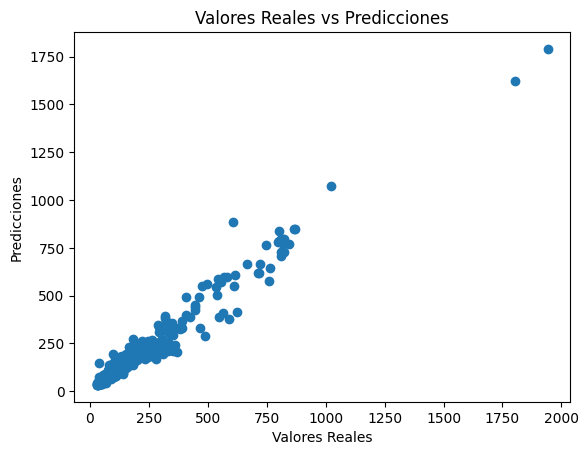

In [29]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

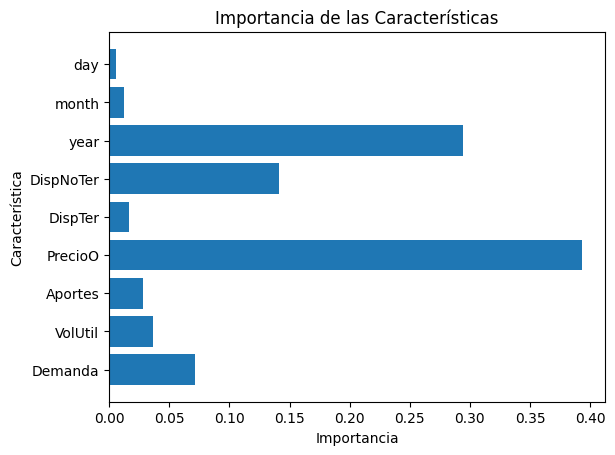

In [30]:
#Importancia de las características: 
importances = best_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()

In [55]:
#Predicciones entre 2022 a 2024
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time_future = pd.to_datetime('2019-03-02')
end_time_future = pd.to_datetime('2024-05-07')

In [56]:
# Filtra el DataFrame
df_future = df_DataModel[df_DataModel['Date'].between(start_time_future, end_time_future)]

In [57]:
precioB_future = df_future['PrecioB']  # la columna 'PrecioB'

In [58]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1887 entries, 6999 to 8885
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1887 non-null   datetime64[ns]
 1   Demanda    1887 non-null   float64       
 2   VolUtil    1887 non-null   float64       
 3   Aportes    1887 non-null   float64       
 4   PrecioB    1887 non-null   float64       
 5   PrecioO    1887 non-null   float64       
 6   DispTer    1887 non-null   float64       
 7   DispNoTer  1887 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 132.7 KB


In [59]:
# Convertir la columna de fecha a múltiples columnas numéricas
df_future['year'] = df_future['Date'].dt.year
df_future['month'] = df_future['Date'].dt.month
df_future['day'] = df_future['Date'].dt.day
df_future = df_future.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_13476\4289330071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['year'] = df_future['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_13476\4289330071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['month'] = df_future['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_13476\4289330071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [60]:
df_future2 = df_future.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'

In [61]:
df_future2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1887 entries, 6999 to 8885
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    1887 non-null   float64
 1   VolUtil    1887 non-null   float64
 2   Aportes    1887 non-null   float64
 3   PrecioO    1887 non-null   float64
 4   DispTer    1887 non-null   float64
 5   DispNoTer  1887 non-null   float64
 6   year       1887 non-null   int32  
 7   month      1887 non-null   int32  
 8   day        1887 non-null   int32  
dtypes: float64(6), int32(3)
memory usage: 125.3 KB


In [62]:
predicciones_futuras = best_model.predict(df_future2)

In [63]:
print(f'Las predicciones de PrecioB para los datos futuros son: {predicciones_futuras}')

Las predicciones de PrecioB para los datos futuros son: [341.44005694 314.40880135 344.34398652 ... 537.82645683 515.97662946
 514.9250651 ]


In [64]:
# Crear un nuevo DataFrame con las predicciones y las columnas de fecha
df_predicciones = pd.DataFrame({
    'year': df_future['year'],
    'month': df_future['month'],
    'day': df_future['day'],
    'Prediccion_PrecioB': predicciones_futuras
})

In [65]:
print(df_predicciones)

      year  month  day  Prediccion_PrecioB
6999  2019      3    2          341.440057
7000  2019      3    3          314.408801
7001  2019      3    4          344.343987
7002  2019      3    5          320.071101
7003  2019      3    6          335.563264
...    ...    ...  ...                 ...
8881  2024      4   26          578.565054
8882  2024      4   27          563.533992
8883  2024      4   28          537.826457
8884  2024      4   29          515.976629
8885  2024      4   30          514.925065

[1887 rows x 4 columns]


In [66]:
precio_real = df_DataModel[df_DataModel['Date'] == '2019-03-2']
print(precio_real)

           Date       Demanda       VolUtil      Aportes    PrecioB  \
6999 2019-03-02  7.841278e+06  8.365556e+09  102977300.0  333.57139   

         PrecioO      DispTer     DispNoTer  
6999  378.917146  4284013.875  9.156821e+06  


In [67]:
# Calcular el RMSE
rmse_future = mean_squared_error(precioB_future, predicciones_futuras, squared=False)
print(f'RMSE: {rmse_future}')

RMSE: 210.06443824444727


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [68]:
# Calcular el R^2
r2_future = r2_score(precioB_future, predicciones_futuras)
print(f'R^2: {r2_future}')

R^2: 0.176577496899048


In [69]:
# Calcular los residuos
residuos_future = precioB_future - predicciones_futuras

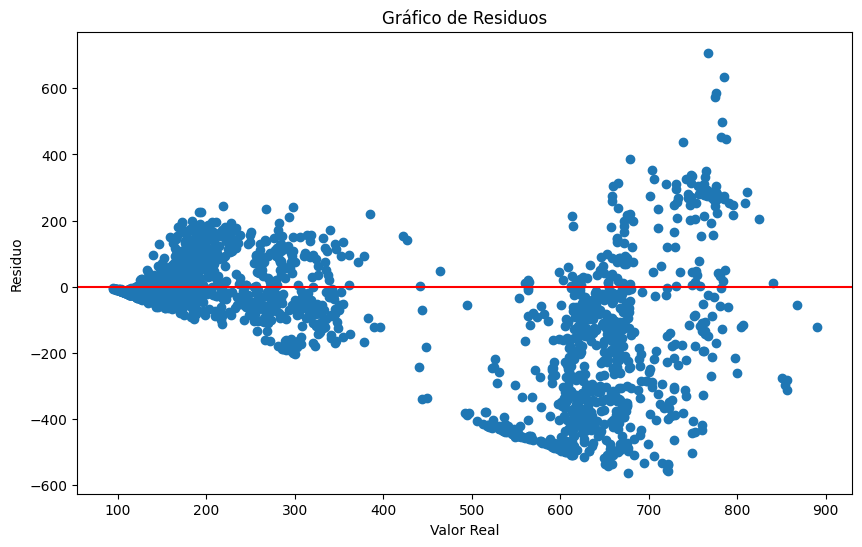

In [70]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(predicciones_futuras, residuos_future)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

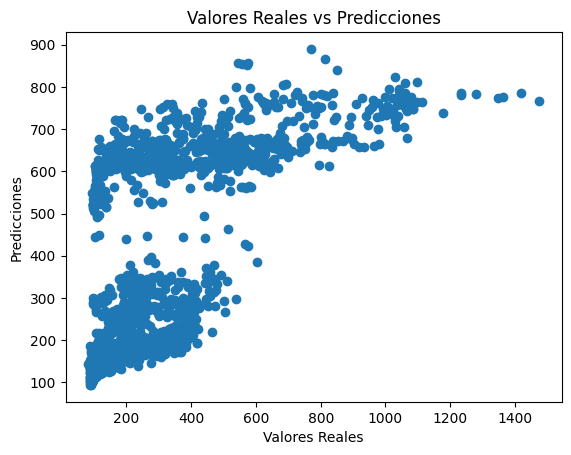

In [71]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(precioB_future, predicciones_futuras)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

In [72]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1887 entries, 6999 to 8885
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    1887 non-null   float64
 1   VolUtil    1887 non-null   float64
 2   Aportes    1887 non-null   float64
 3   PrecioB    1887 non-null   float64
 4   PrecioO    1887 non-null   float64
 5   DispTer    1887 non-null   float64
 6   DispNoTer  1887 non-null   float64
 7   year       1887 non-null   int32  
 8   month      1887 non-null   int32  
 9   day        1887 non-null   int32  
dtypes: float64(7), int32(3)
memory usage: 140.1 KB


In [73]:
df_predicciones['Date'] = pd.to_datetime(df_predicciones[['year', 'month', 'day']])
df_predicciones = df_predicciones.drop(['year', 'month', 'day'], axis=1)

In [74]:
df_predicciones.head()

,Prediccion_PrecioB,Date
6999,341.440057,2019-03-02
7000,314.408801,2019-03-03
7001,344.343987,2019-03-04
7002,320.071101,2019-03-05
7003,335.563264,2019-03-06


In [75]:
# Añadir 'precioB_future' al DataFrame
df_predicciones= df_predicciones.assign(PrecioB_future=precioB_future)

In [76]:
df_predicciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1887 entries, 6999 to 8885
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Prediccion_PrecioB  1887 non-null   float64       
 1   Date                1887 non-null   datetime64[ns]
 2   PrecioB_future      1887 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 59.0 KB


In [77]:
df_predicciones.head(10)

,Prediccion_PrecioB,Date,PrecioB_future
6999,341.440057,2019-03-02,333.571390
7000,314.408801,2019-03-03,296.653067
7001,344.343987,2019-03-04,322.159620
7002,320.071101,2019-03-05,317.929557
7003,335.563264,2019-03-06,320.651190
7004,338.543401,2019-03-07,307.688698
7005,303.098083,2019-03-08,309.247802
7006,313.933126,2019-03-09,292.158292
7007,276.323588,2019-03-10,272.958432
7008,308.215845,2019-03-11,278.106112


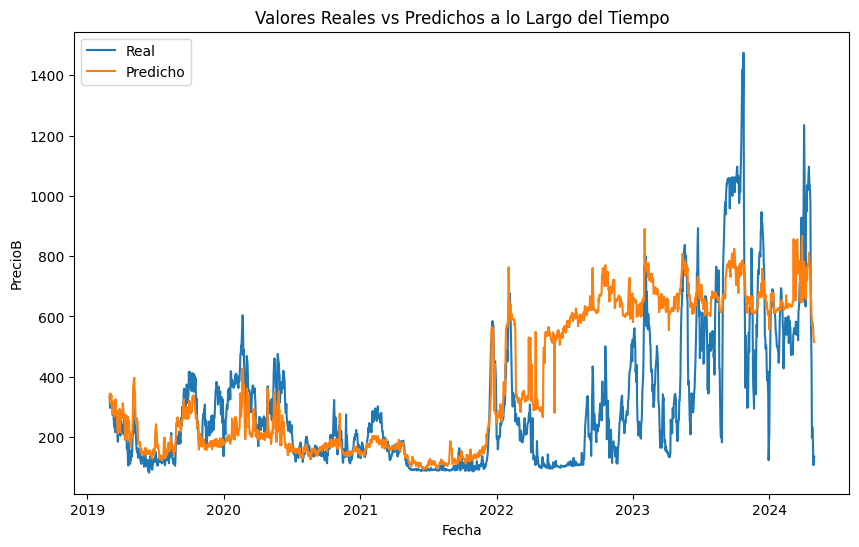

: 

In [78]:
# Crear el gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(df_predicciones['Date'], df_predicciones['PrecioB_future'], label='Real')
plt.plot(df_predicciones['Date'], df_predicciones['Prediccion_PrecioB'], label='Predicho')
plt.xlabel('Fecha')
plt.ylabel('PrecioB')
plt.title('Valores Reales vs Predichos a lo Largo del Tiempo')
plt.legend()
plt.show()